# Coordinate systems and transforms of Synthesis AI face dataset

At first, we install some dependencies.

Installing `face_api_dataset` from the github it it's not already installed.

In [1]:
%%bash

(python -c "import face_api_dataset")
if [ $? -eq 0 ]
then
    echo "face_api_dataset is already installed"
else
    echo "installing face_api_dataset from github"
    pip install git+https://github.com/Synthesis-AI-Dev/face_api_dataset.git
fi

face_api_dataset is already installed


Installing `git lfs` from the github it it's not already installed.

In [2]:
%%bash

(git lfs install > /dev/null)
if [ $? -eq 0 ]
then
    echo "git lfs is already installed"
else
    echo "installing git lfs"
    case "$(uname -s)" in

       Darwin)
         brew install git-lfs
         ;;

       Linux)
         curl -s https://packagecloud.io/install/repositories/github/git-lfs/script.deb.sh | sudo bash
         apt-get install git-lfs
         ;;

       *)
         echo "This cell can't install git lfs your OS. Please take care of it yourself."
         ;;
    esac
fi

git lfs is already installed


Pulling the test dataset for the example

In [3]:
%%bash

if [ -d "../test_dataset" ]
then
    echo "test_dataset is already present"
else
    echo "downloading test_dataset"
    git clone https://github.com/Synthesis-AI-Dev/face_api_dataset
    mv face_api_dataset/test_dataset ..
    rm -rf face_api_dataset
fi

test_dataset is already present


Finally we add some imports for the visualisation.

In [4]:
import cv2
%matplotlib inline

In [5]:
import numpy as np

We use `FaceApiDataset` class to access synthesis datasets.


In [6]:
from face_api_dataset import FaceApiDataset, Modality

**Warning!** Some of modalities requires additional libraries to be installed:
`SEGMENTS` and `RGB` modalities use `opencv-python` library,
 while `DEPTH`, `ALPHA` and `NORMALS` modalities
 use `tiffile`  and `imagecodecs` libraries for effective work with floating point tiff files.
 If dataset with these modalities will be created without corresponding libraries present, an `ImportError` is raised.


In [7]:
data_root = "../test_dataset"
dataset = FaceApiDataset(data_root,
                        modalities=[Modality.RGB, Modality.CAM_TO_HEAD, Modality.HEAD_TO_CAM,
                                    Modality.WORLD_TO_HEAD, Modality.HEAD_TO_WORLD, Modality.WORLD_TO_CAM,
                                    Modality.CAM_TO_WORLD, Modality.LANDMARKS_3D_IBUG68
                                   ])

In [8]:
len(dataset)

13

There are 13 items in the test dataset. Let's explore them closer.

In [9]:
item = dataset[0]
item2 = dataset[1]

Each item is a dict with different modalities as keys.

In [10]:
print(item.keys())

dict_keys([<Modality.RGB: 2>, <Modality.LANDMARKS_3D_IBUG68: 13>, <Modality.HEAD_TO_CAM: 27>, <Modality.CAM_TO_HEAD: 28>, <Modality.HEAD_TO_WORLD: 29>, <Modality.WORLD_TO_HEAD: 30>, <Modality.CAM_TO_WORLD: 31>, <Modality.WORLD_TO_CAM: 32>])


In Synthesis AI face dataset we use 3 different coordinate systems:
1.  World coordinate system.
2.  Camera coordinate system, centered at the camera with x-axis directed right, y-axis directed top and z-axis directed towards the camera.
3.  Face coordinate system, centered at the center of the face with x-axis directed toward the left ear, y-axis directed to the top of the head and z-axis directed towards the nose.

We provide transformations between head, camera and world coordinates systems as 4x4 matrices in homogeneous coordinates.

In [11]:
item[Modality.CAM_TO_HEAD]

array([[ 0.91943557,  0.38773762, -0.06555085, -0.04506141],
       [-0.3678648 ,  0.90698111,  0.20508672,  0.21287085],
       [ 0.13897369, -0.16445034,  0.97654591,  0.96441826],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [12]:
item[Modality.HEAD_TO_CAM]

array([[ 0.91943598, -0.36786401,  0.13897333, -0.0142898 ],
       [ 0.38773882,  0.90698159, -0.1644503 , -0.01699901],
       [-0.06555107,  0.20508698,  0.97654647, -0.98841011],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [13]:
item[Modality.HEAD_TO_WORLD]

array([[ 0.91943598, -0.36786401,  0.13897333, -0.01408178],
       [ 0.38773882,  0.90698159, -0.1644503 ,  1.52233601],
       [-0.06555107,  0.20508698,  0.97654647,  0.07845503],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [14]:
item[Modality.WORLD_TO_HEAD]

array([[ 0.91943557,  0.38773762, -0.06555085, -0.57217686],
       [-0.3678648 ,  0.90698111,  0.20508672, -1.40200027],
       [ 0.13897369, -0.16445034,  0.97654591,  0.17569073],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [15]:
item[Modality.CAM_TO_WORLD]

array([[ 1.00000000e+00,  5.67512214e-19, -1.73472368e-18,
         2.08026977e-04],
       [-5.67512214e-19,  1.00000000e+00, -1.21480170e-16,
         1.53933501e+00],
       [ 1.73472368e-18,  1.21480170e-16,  1.00000000e+00,
         1.06686514e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [16]:
item[Modality.WORLD_TO_CAM]

array([[ 1.00000000e+00, -5.96311195e-19,  1.73472368e-18,
        -2.08026977e-04],
       [ 5.67512214e-19,  1.00000000e+00,  1.21480170e-16,
        -1.53933501e+00],
       [-1.73472368e-18, -2.22044605e-16,  1.00000000e+00,
        -1.06686514e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

X_TO_Y transform is always inverse of Y_TO_X:

In [17]:
np.testing.assert_allclose(item[Modality.CAM_TO_HEAD] @ item[Modality.HEAD_TO_CAM], np.eye(4), atol=1e-10)
np.testing.assert_allclose(item[Modality.HEAD_TO_WORLD] @ item[Modality.WORLD_TO_HEAD], np.eye(4), atol=1e-10)
np.testing.assert_allclose(item[Modality.CAM_TO_WORLD] @ item[Modality.WORLD_TO_CAM], np.eye(4), atol=1e-10)

And composition of X_TO_Y and Z_TO_X transforms always give Z_TO_Y transform:

In [18]:
np.testing.assert_allclose(item[Modality.CAM_TO_WORLD], item[Modality.HEAD_TO_WORLD] @ item[Modality.CAM_TO_HEAD], atol=1e-10)


All 3D coordinates (ex. landmarks) are always given in camera coordinates.

In [19]:
item[Modality.LANDMARKS_3D_IBUG68]['0']

(-0.08835702389478683, -0.040816426277160645, -1.025882363319397)

If we want to get coordinates in the face coordinate system (they should be independent on camera position and pitch/yaw/roll values),
we need to multiply them by CAM_TO_HEAD transform.

However, as matrices are in homogeneous coordinates, first we will need to transform them to homogeneous coordinates:

In [20]:
def to_homogeneous(xs):
    xs_array = np.array(xs)
    assert (xs_array.shape[-1] == 3)
    ones_shape = list(xs_array.shape)
    ones_shape[-1] = 1
    homogeneous = np.concatenate([xs_array, np.ones(ones_shape)], axis=-1)
    return homogeneous

In [21]:
homogeneous_cam = to_homogeneous(item[Modality.LANDMARKS_3D_IBUG68]['0'])
homogeneous_cam

array([-0.08835702, -0.04081643, -1.02588236,  1.        ])

We wrote our own function instead of using opecv one, so it can work with multidimensional arrays of points.
Opencv function can work only with 1-d arrays of points, neither single point, nor multidimensional arrays are supported.
In this particular case, opencv function will suffice:

In [22]:
cv2.convertPointsToHomogeneous(np.array([item[Modality.LANDMARKS_3D_IBUG68]['0']]))[0]

array([[-0.08835702, -0.04081643, -1.02588236,  1.        ]])

Now, we can compute homogeneous coordinates in head coordinate system.

In [23]:
homogeneous_head = item[Modality.CAM_TO_HEAD] @ homogeneous_cam
homogeneous_head

array([-0.07487861, -0.00204029, -0.04296999,  1.        ])

Now, we need to transform back to euclidian coordinates:

In [24]:
def from_homogeneous(xs):
    xs_array = np.array(xs)
    assert (xs_array.shape[-1] == 4)

    slice_but_last = list(xs_array.shape)
    slice_but_last[-1] = slice(None, -1)
    slice_but_last = tuple(slice_but_last)

    slice_last = list(xs_array.shape)
    slice_last[-1] = slice(-1, None)
    slice_last = tuple(slice_last)

    return xs_array[slice_but_last] / xs_array[slice_last]

And we can compute euclidian coordinates in the head space as:

In [25]:
from_homogeneous(homogeneous_head)

array([-0.07487861, -0.00204029, -0.04296999])

Once again, we can use opencv convertion function:

In [26]:
cv2.convertPointsFromHomogeneous(np.array([homogeneous_head]))[0]

array([[-0.07487861, -0.00204029, -0.04296999]])

We can use these transforms to estimate pitch/yaw/roll values (rotation of the head, relative to the world).

In [27]:
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt


In [28]:
def get_yaw_pitch_roll_world(item):
    rotation = R.from_matrix(item[Modality.WORLD_TO_HEAD][:3,:3])

    # We multiply resulting angles by [-1, 1, -1] to use the same positive axis
    # as in job generaton json.
    yaw, pitch, roll = rotation.as_euler("YXZ", degrees=True) * [-1, 1,-1]
    return yaw, pitch, roll

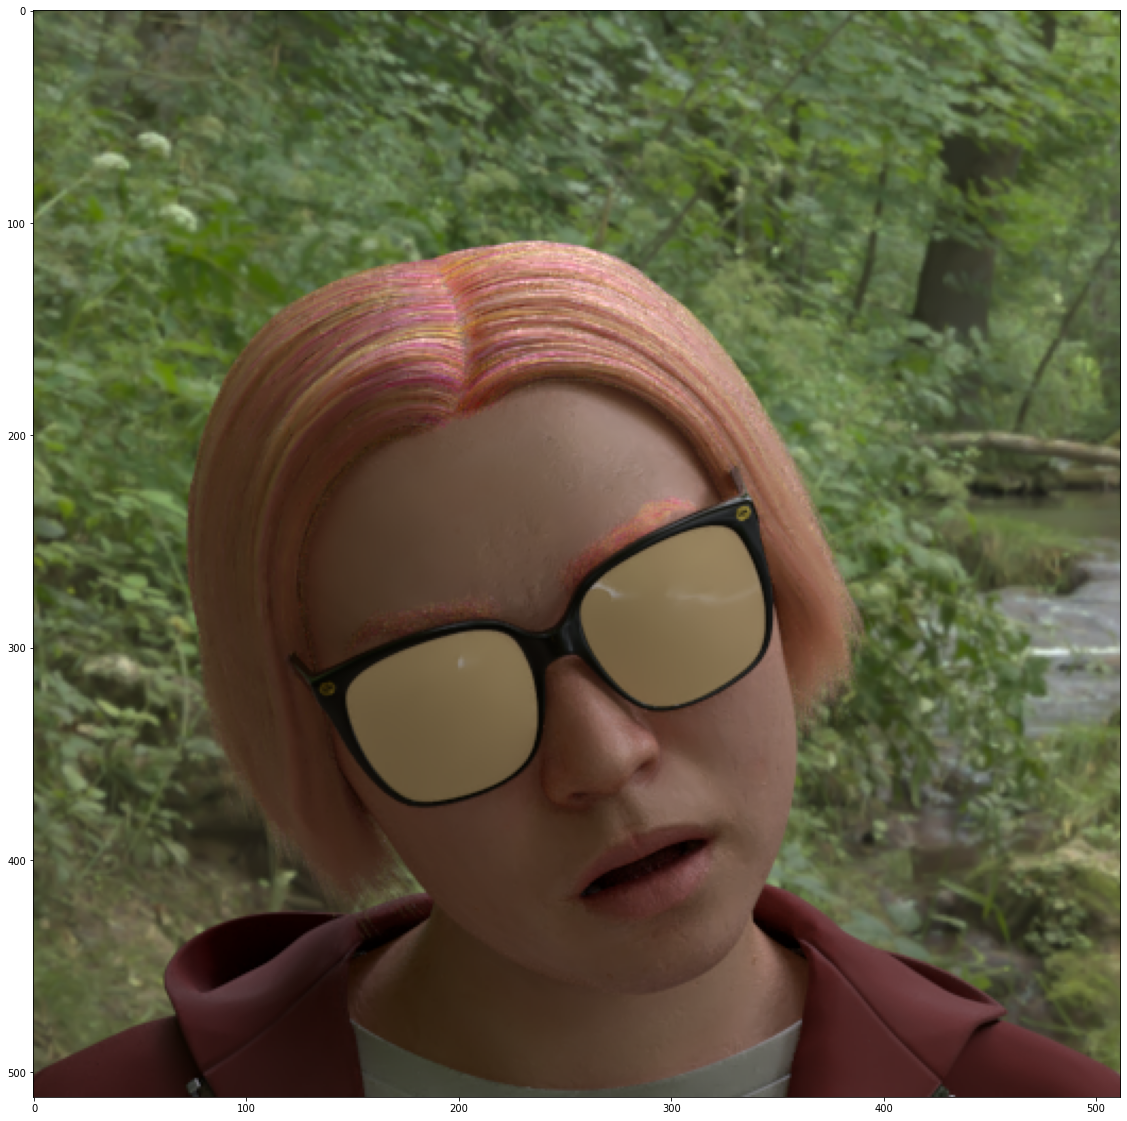

In [29]:
plt.figure(figsize=(20,20))
plt.imshow(item[Modality.RGB])

In [30]:
get_yaw_pitch_roll_world(item)

(3.8402394417144783, -11.834582533052112, 22.077080298797593)

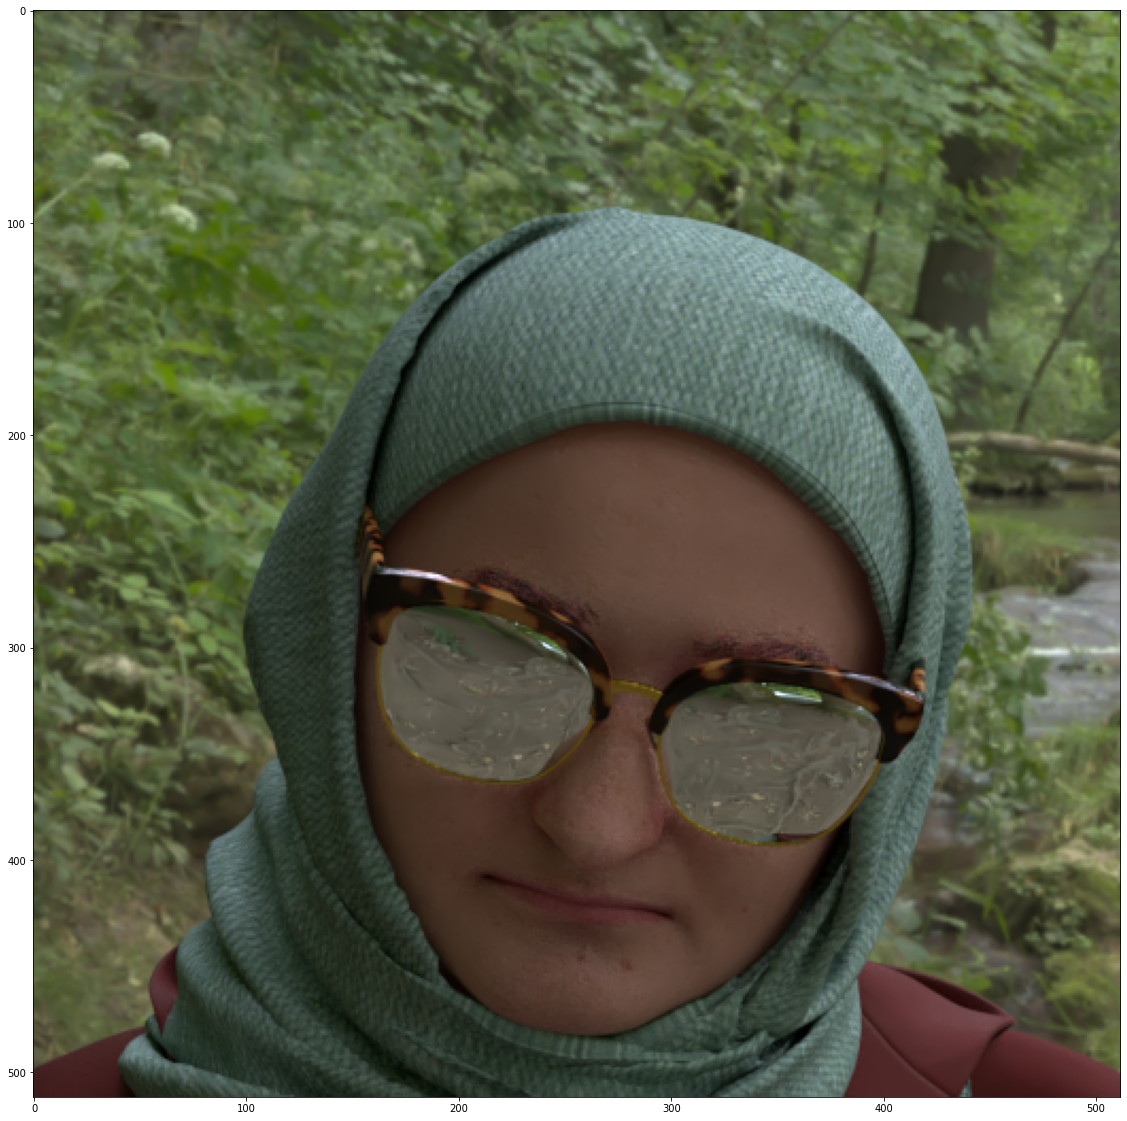

In [31]:
plt.figure(figsize=(20,20))
plt.imshow(item2[Modality.RGB])

In [32]:
get_yaw_pitch_roll_world(item2)



(3.5345056123410576, -15.410238401902163, -14.139922395331077)